In [67]:
using Plots

include("environments.jl")
include("tabularLearning.jl")
include("linearLearning.jl")
include("deepLearning.jl")

deep_Qlearning (generic function with 6 methods)

****************

/Users/akmoussa/.julia/conda/3/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

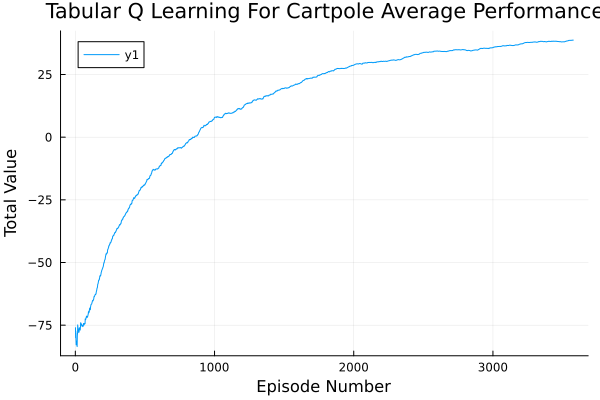

In [2]:
cart = DiscreteCartpole(10)
reset!(cart)
q_perf = tabular_Qlearning(cart, 0.3, 500000)
q_perf2 = [mean(q_perf[1:i]) for i in 1:length(q_perf)]
plot(1:length(q_perf2), q_perf2)
title!("Tabular Q Learning For Cartpole Average Performance")
xlabel!("Episode Number")
ylabel!("Total Value")

In [3]:
cart = Cartpole()
reset!(cart)

4-element Vector{Float32}:
  0.020970138
 -0.019499503
 -0.028524186
 -0.027558476

In [4]:
reset!(cart)
#feature_selector = rbf_feature_selector([-2.4, -2, -0.218, -3.5, 0], [2.4, 2, 0.218, 3.5, 1], 0.1, 4.0, 5)
scaleFactor = 10.0/0.4
feature_selector = tile_coding_feature_selector([3,20,5,20,2], [[-2.4, 2.4] [-2, 2] [-0.218, 0.218] [-3.5, 3.5] [1, 2]], 9)

285768


feature_selector (generic function with 1 method)

In [5]:
feature_selector([0.0, -1.0, -0.1, -2],1)

285768-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

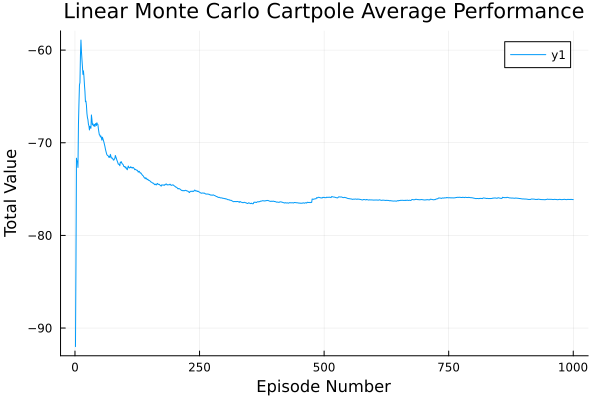

In [6]:
lin_perf = linear_montecarlo_control(cart, feature_selector, 0.1, 1000, 0.1)
lin_perf2 = [mean(lin_perf[1:i]) for i in 1:length(lin_perf)]
plot(1:length(lin_perf2), lin_perf2)
title!("Linear Monte Carlo Cartpole Average Performance")
xlabel!("Episode Number")
ylabel!("Total Value")

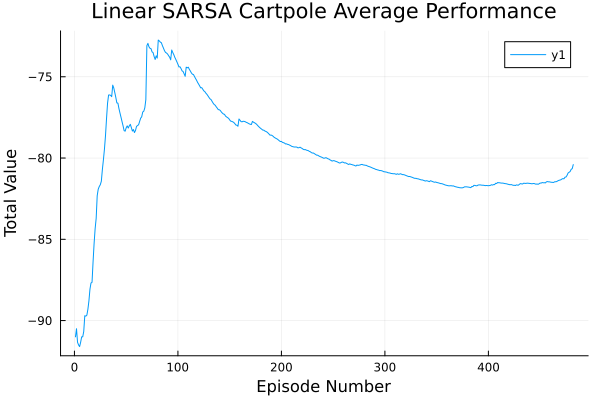

In [10]:
lin_perf = linear_sarsa_control(cart, feature_selector, 0.05, 10000, 0.1)
lin_perf2 = [mean(lin_perf[1:i]) for i in 1:length(lin_perf)]
plot(1:length(lin_perf2), lin_perf2)
title!("Linear SARSA Cartpole Average Performance")
xlabel!("Episode Number")
ylabel!("Total Value")

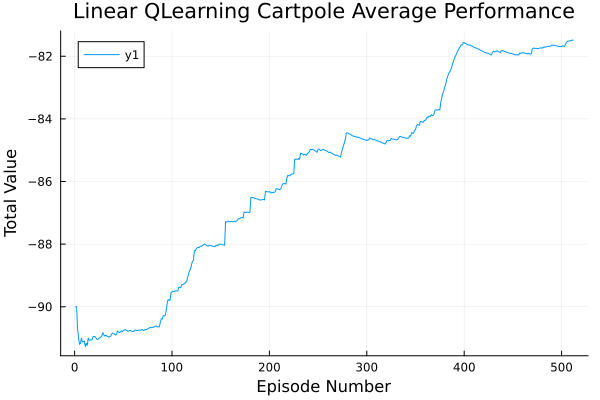

In [8]:
lin_perf = linear_Qlearning(cart, feature_selector, 0.05, 10000, 0.1)
lin_perf2 = [mean(lin_perf[1:i]) for i in 1:length(lin_perf)]
plot(1:length(lin_perf2), lin_perf2)
title!("Linear QLearning Cartpole Average Performance")
xlabel!("Episode Number")
ylabel!("Total Value")